In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

file_path = '/content/drive/My Drive/housing.csv'
data = pd.read_csv(file_path)

# show the first five rows
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())
print(data.isnull().sum())
data.dropna(inplace=True)
print(data.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


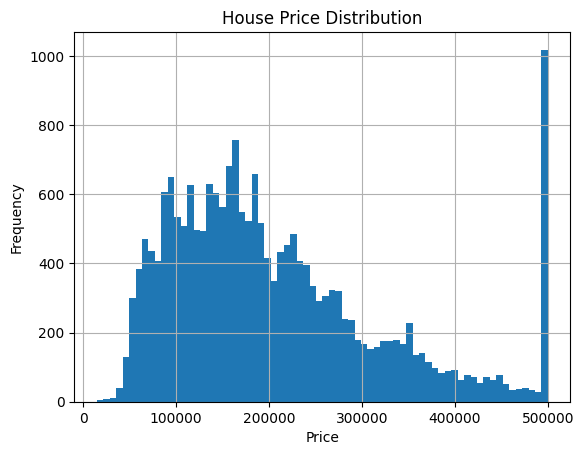

In [20]:
data['median_house_value'].hist(bins=70)
plt.title('House Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

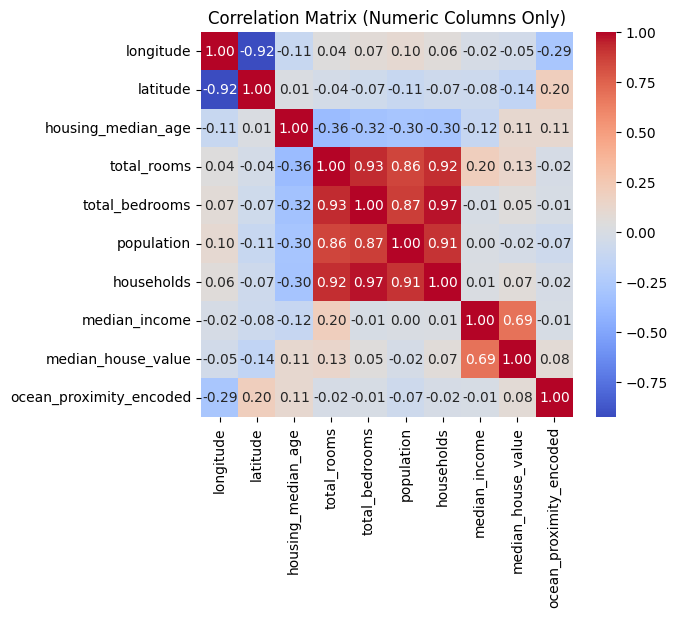

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# encode 'ocean_proximity'
label_encoder = LabelEncoder()
data['ocean_proximity_encoded'] = label_encoder.fit_transform(data['ocean_proximity'])

numeric_data = data.select_dtypes(include=['float64', 'int64'])

# calculate correlation
corr = numeric_data.corr()

# plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()


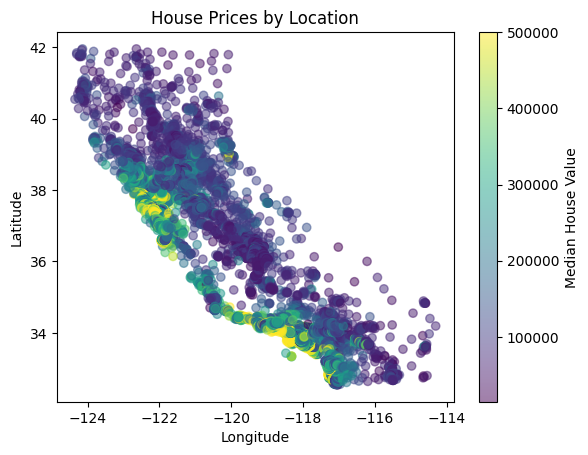

In [15]:
plt.scatter(data['longitude'], data['latitude'], c=data['median_house_value'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices by Location')
plt.show()

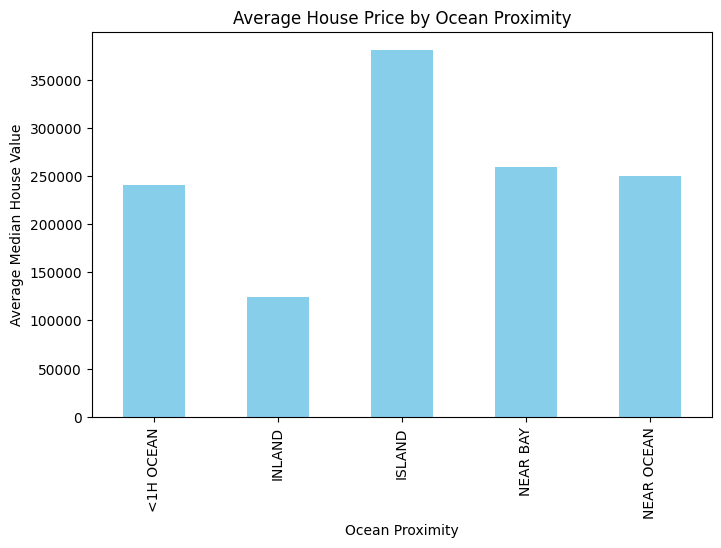

In [17]:
avg_price_by_proximity = data.groupby('ocean_proximity')['median_house_value'].mean()
avg_price_by_proximity.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.xlabel('Ocean Proximity')
plt.ylabel('Average Median House Value')
plt.title('Average House Price by Ocean Proximity')
plt.show()

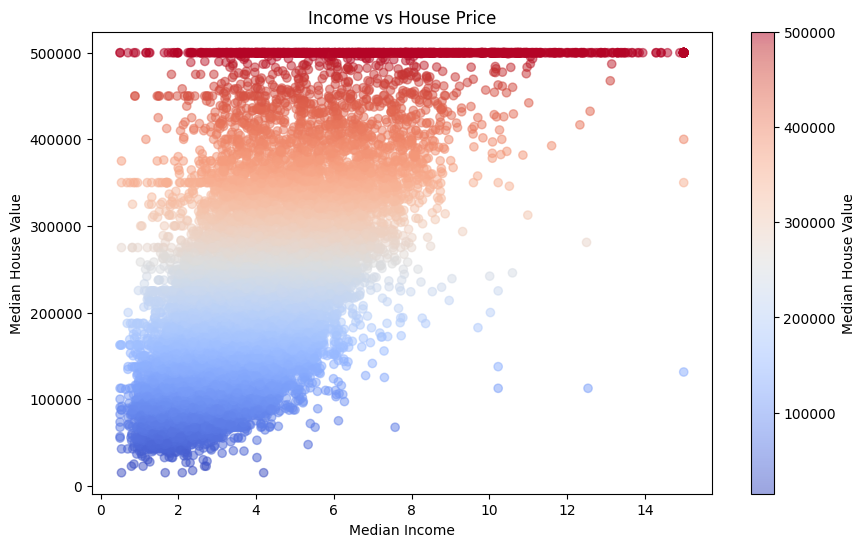

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(data['median_income'], data['median_house_value'], alpha=0.5, c=data['median_house_value'], cmap='coolwarm')
plt.colorbar(label='Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Income vs House Price')
plt.show()

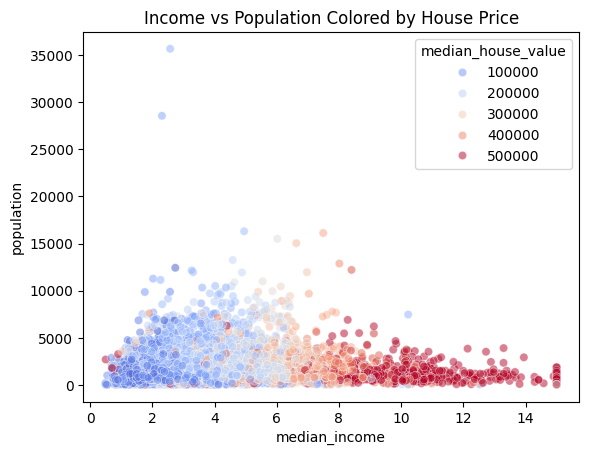

In [19]:
sns.scatterplot(x='median_income', y='population', hue='median_house_value', data=data, palette='coolwarm', alpha=0.5)
plt.title('Income vs Population Colored by House Price')
plt.show()